In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import *
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = [11, 8]

In [2]:
landmarks_file = "./data/map_data.txt"
obs_file = "./data/observation/observations_000001.txt"

with open(landmarks_file) as f:
    x_land = []
    y_land = []
    id_land = []
    for line in f: 
        data = line.split()
        x_land.append(data[0])
        y_land.append(data[1])
        id_land.append(data[2])    
    
with open(obs_file) as f:
    x_obs = []
    y_obs = []
    for line in f: 
        data = line.split()
        x_obs.append(data[0])
        y_obs.append(data[1])   
    
    

In [3]:
gt_x = 5.90658
gt_y = 2.4434
gt_theta = 0.013828
# gt_theta = 0.00774049

x_converted = []
y_converted = []

for x in x_obs:
    x_converted.append(gt_x * cos(gt_theta) + gt_y * sin(gt_theta) + float(x))

for y in y_obs:
    y_converted.append(gt_x * sin(gt_theta) + gt_y * cos(gt_theta) + float(y))

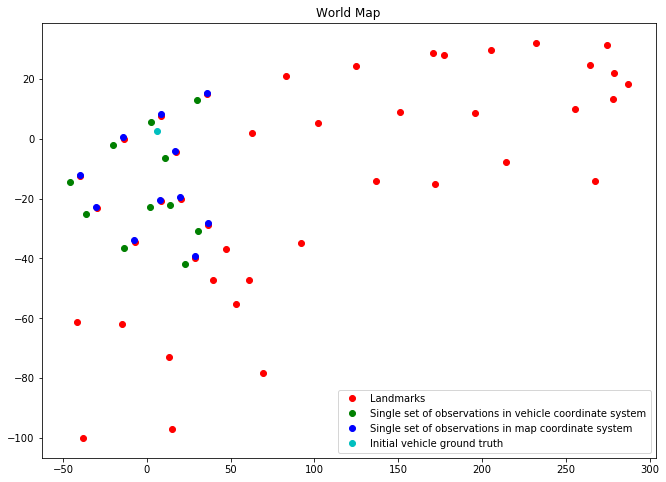

In [4]:
p1 = plt.plot(x_land, y_land, 'ro')
p2 = plt.plot(x_obs, y_obs, 'go')
p3 = plt.plot(x_converted, y_converted, 'bo')
p4 = plt.plot(gt_x, gt_y, 'co')

plt.title('World Map')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Landmarks', 'Single set of observations in vehicle coordinate system', 'Single set of observations in map coordinate system', 'Initial vehicle ground truth'))
plt.show()

In [5]:
obs_file_2 = "./data/observation/observations_000002.txt"

with open(obs_file_2) as f:
    x_obs_2 = []
    y_obs_2 = []
    for line in f: 
        data = line.split()
        x_obs_2.append(data[0])
        y_obs_2.append(data[1])   

In [6]:
new_x = 5.95104
new_y = 2.14137
new_theta = 0.00774049


velocity = 3.9611
yaw_rate = 3.0937
delta_t = 0.1

pred_x = new_x +  velocity/yaw_rate * (sin(new_theta + yaw_rate * delta_t) - sin(new_theta))
pred_y = new_y +  velocity/yaw_rate * (cos(new_theta) - cos(new_theta + delta_t * yaw_rate))
pred_theta =(new_theta + delta_t * yaw_rate )%(2*pi)


In [7]:

x_converted = []
y_converted = []

for x in x_obs_2:
    x_converted.append(new_x * cos(gt_theta) + new_y * sin(new_theta) + float(x))

for y in y_obs_2:
    y_converted.append(new_x * sin(gt_theta) + new_y * cos(new_theta) + float(y))

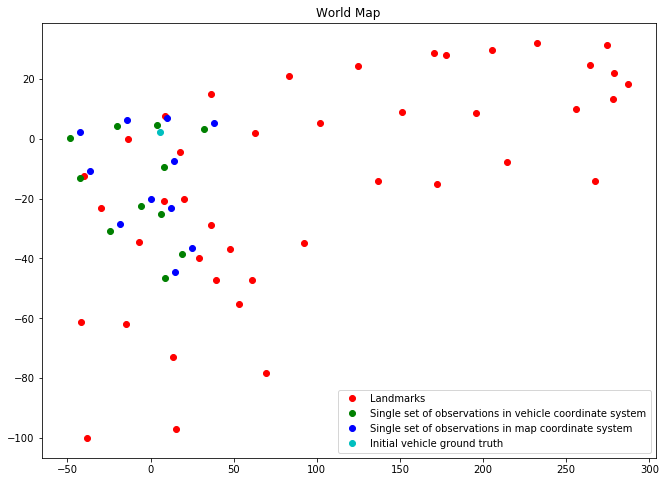

In [8]:
p1 = plt.plot(x_land, y_land, 'ro')
p2 = plt.plot(x_obs_2, y_obs_2, 'go')
p3 = plt.plot(x_converted, y_converted, 'bo')
p4 = plt.plot(new_x, new_y, 'co')

plt.title('World Map')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Landmarks', 'Single set of observations in vehicle coordinate system', 'Single set of observations in map coordinate system', 'Initial vehicle ground truth'))
plt.show()